# **Kidney Dieses Classification in 4 classes using 3 different model (VGG, MOBILENET, RESNET)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
data_dir='/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [9]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

In [10]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32,)


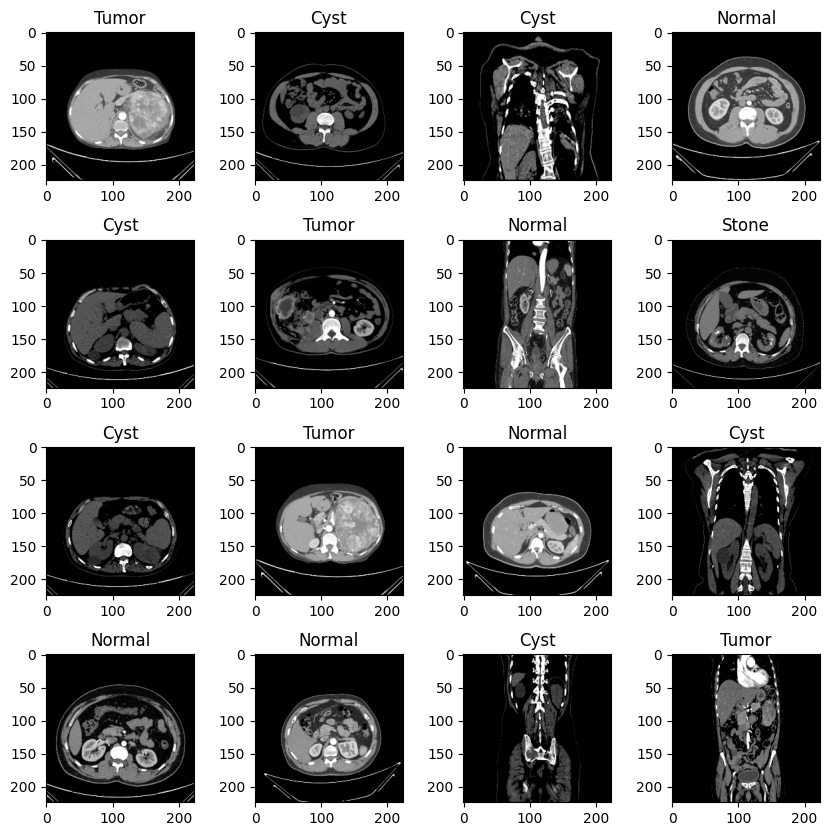

In [11]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [12]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

**VGG**

In [18]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224 ,3), pooling='max',classes=4, weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [20]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
VGG_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                      

In [22]:
epochs=10
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
351/351 [==============================] - 69s 173ms/step - loss: 0.4465 - accuracy: 0.8406 - val_loss: 0.1466 - val_accuracy: 0.9538
Epoch 2/10
351/351 [==============================] - 60s 170ms/step - loss: 0.1742 - accuracy: 0.9383 - val_loss: 0.1264 - val_accuracy: 0.9586
Epoch 3/10
351/351 [==============================] - 60s 170ms/step - loss: 0.1244 - accuracy: 0.9546 - val_loss: 0.1222 - val_accuracy: 0.9542
Epoch 4/10
351/351 [==============================] - 60s 170ms/step - loss: 0.1007 - accuracy: 0.9657 - val_loss: 0.1045 - val_accuracy: 0.9638
Epoch 5/10
351/351 [==============================] - 60s 171ms/step - loss: 0.0834 - accuracy: 0.9711 - val_loss: 0.0687 - val_accuracy: 0.9775
Epoch 6/10
351/351 [==============================] - 60s 171ms/step - loss: 0.0730 - accuracy: 0.9738 - val_loss: 0.0823 - val_accuracy: 0.9667
Epoch 7/10
351/351 [==============================] - 60s 171ms/step - loss: 0.0734 - accuracy: 0.9728 - val_loss: 0.1791 - val_ac

In [23]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('VGG_training.csv', index=False)

In [25]:
VGG_model.save('VGG_model.h5')

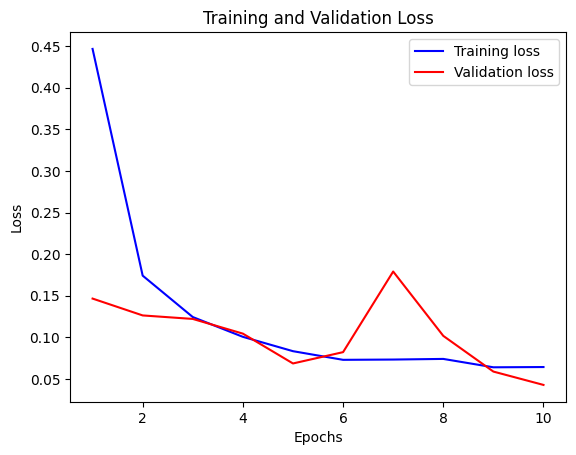

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

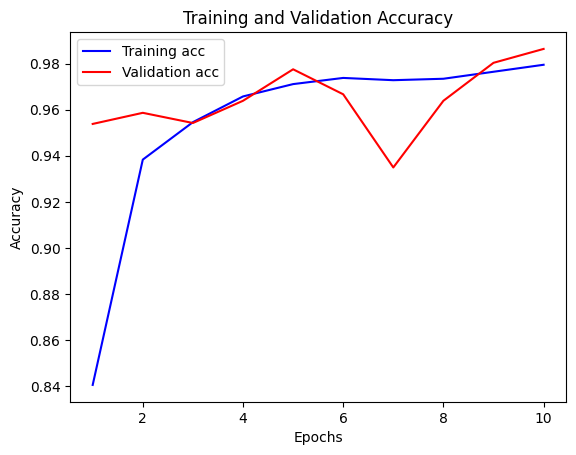

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


In [29]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf
predictions = VGG_model.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 10s 134ms/step


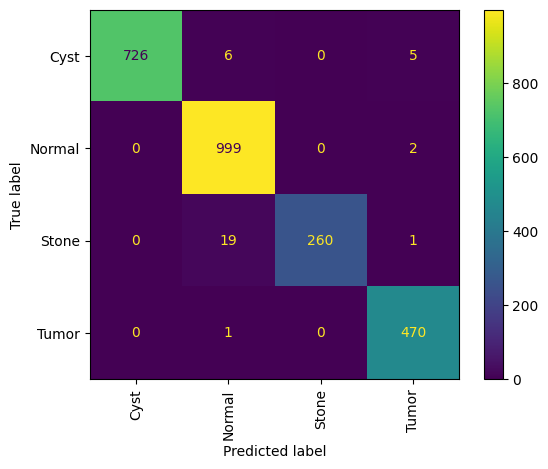

In [31]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


In [36]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
print(f"Accuracy: {accuracy:.4f}")


# Calculate F1 score for each class and the weighted average
f1 = f1_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

Accuracy: 0.9863
F1 Score (weighted): 0.9863


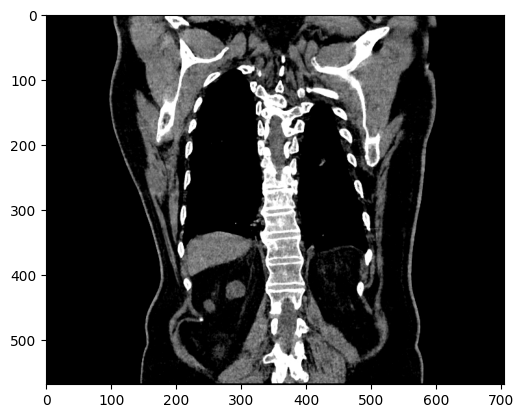

1/1 [==============================] - 1s 815ms/step


'Cyst'

In [33]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (224,224))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**MOBILENET**

In [37]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
input_shape = (224, 224, 3)
MobileNetV2_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

for _ in range(8):
    MobileNetV2_model.layers.pop()
for layer in MobileNetV2_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(MobileNetV2_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
output = Dense(4, activation='softmax')(x)

mobile_net = Model(inputs=MobileNetV2_model.input, outputs=output)

9406464/9406464 [==============================] - 0s 0us/step


In [38]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# mobile_net.summary()


In [39]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 83s 144ms/step - loss: 0.2797 - accuracy: 0.9400 - val_loss: 3.1248 - val_accuracy: 0.6400
Epoch 2/15
351/351 [==============================] - 48s 136ms/step - loss: 0.1508 - accuracy: 0.9773 - val_loss: 6.2457 - val_accuracy: 0.5978
Epoch 3/15
351/351 [==============================] - 48s 137ms/step - loss: 0.1346 - accuracy: 0.9785 - val_loss: 10.8859 - val_accuracy: 0.3495
Epoch 4/15
351/351 [==============================] - 48s 137ms/step - loss: 0.0698 - accuracy: 0.9921 - val_loss: 4.3295 - val_accuracy: 0.6718
Epoch 5/15
351/351 [==============================] - 48s 136ms/step - loss: 0.0587 - accuracy: 0.9923 - val_loss: 7.3052 - val_accuracy: 0.6581
Epoch 6/15
351/351 [==============================] - 48s 136ms/step - loss: 0.0360 - accuracy: 0.9963 - val_loss: 4.1520 - val_accuracy: 0.7244
Epoch 7/15
351/351 [==============================] - 48s 137ms/step - loss: 0.0361 - accuracy: 0.9945 - val_loss: 5.1990 - val_a

In [40]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('MobileNet_training.csv', index=False)
mobile_net.save('MobileNet_model.h5')

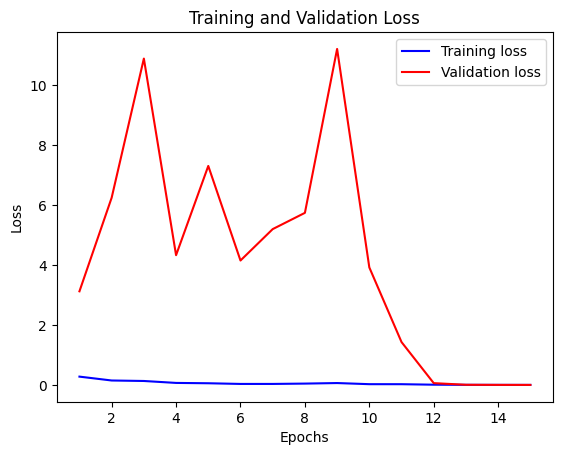

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

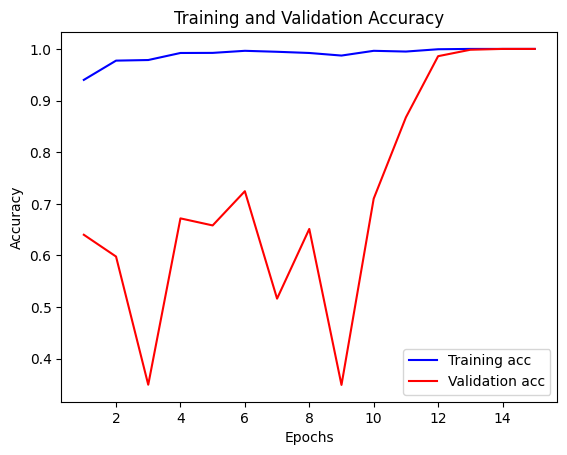

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf


predictions = mobile_net.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('MobileNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 4s 37ms/step


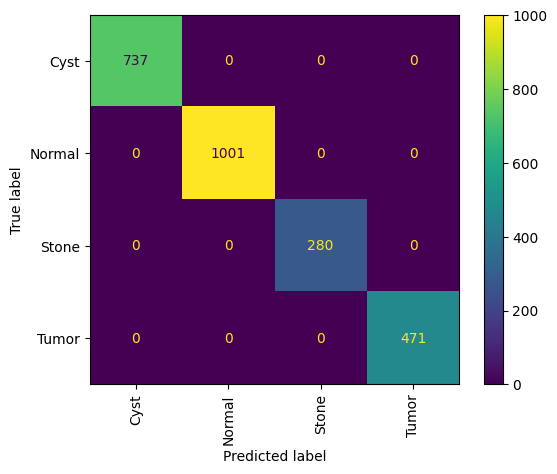

In [44]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('MobileNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


In [47]:
from sklearn.metrics import accuracy_score, f1_score

# Step 6: Calculate accuracy and F1 score
# For multi-class F1, use `average='weighted'` or `average='macro'`
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
f1 = f1_score(true_labels, np.argmax(predictions, axis=1), average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

Accuracy: 1.0000
F1 Score (weighted): 1.0000


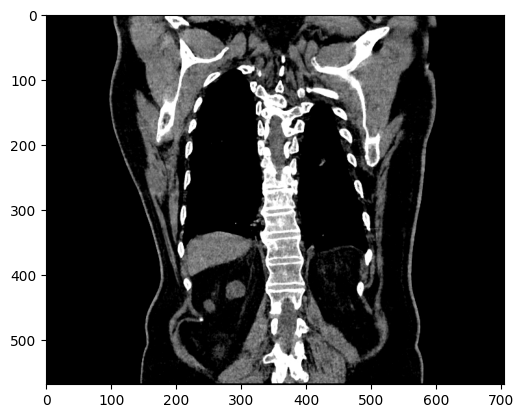

1/1 [==============================] - 1s 1s/step


'Cyst'

In [49]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (224,224))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**ResNet**

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential


resnet_model = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
        
for layer in resnet_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

resnet_net = Model(inputs=resnet_model.input, outputs=output)

In [55]:
resnet_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
epochs=10
history = resnet_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
351/351 [==============================] - 170s 367ms/step - loss: 0.3456 - accuracy: 0.9166 - val_loss: 9.5902 - val_accuracy: 0.2961
Epoch 2/10
351/351 [==============================] - 125s 356ms/step - loss: 0.1369 - accuracy: 0.9772 - val_loss: 56.8181 - val_accuracy: 0.2961
Epoch 3/10
351/351 [==============================] - 125s 355ms/step - loss: 0.1182 - accuracy: 0.9793 - val_loss: 3.2992 - val_accuracy: 0.5761
Epoch 4/10
351/351 [==============================] - 125s 356ms/step - loss: 0.0710 - accuracy: 0.9894 - val_loss: 2.3668 - val_accuracy: 0.8357
Epoch 5/10
351/351 [==============================] - 125s 356ms/step - loss: 0.0596 - accuracy: 0.9910 - val_loss: 0.0839 - val_accuracy: 0.9883
Epoch 6/10
351/351 [==============================] - 125s 356ms/step - loss: 0.0364 - accuracy: 0.9954 - val_loss: 0.0221 - val_accuracy: 0.9992
Epoch 7/10
351/351 [==============================] - 125s 357ms/step - loss: 0.0265 - accuracy: 0.9977 - val_loss: 0.4460 

In [57]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('ResNet_training.csv', index=False)
resnet_net.save('ResNet_model.h5')

In [58]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Assuming you have a model 'model' and a test dataset 'test_dataset'

# Make predictions using your model
predictions = resnet_net.predict(val)

# Get the true labels from the test dataset
true_labels = np.concatenate([y for x, y in val], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

# Save the confusion matrix in pkl format
with open('ResNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 8s 97ms/step


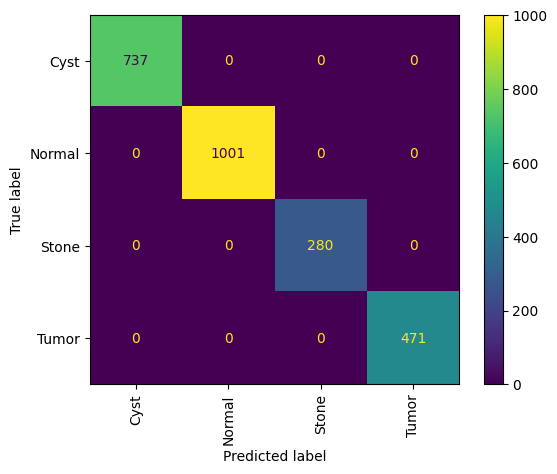

In [60]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the saved confusion matrix
with open('ResNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

# Define class names (assuming you have them)
class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']   # Replace with your actual class names

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

# Show the confusion matrix plot
plt.show()


In [65]:
from sklearn.metrics import accuracy_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
print(f'Accuracy: {accuracy:.4f}')

# Calculate F1 score (assuming you want the macro average)
f1 = f1_score(true_labels, np.argmax(predictions, axis=1), average='macro')
print(f'F1 Score (Macro): {f1:.4f}')



Accuracy: 1.0000
F1 Score (Macro): 1.0000


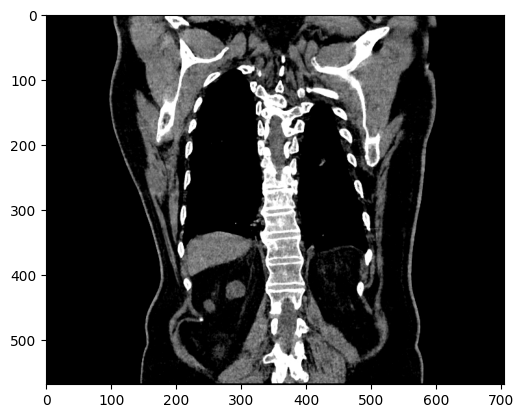

1/1 [==============================] - 1s 1s/step


'Cyst'

In [62]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (224,224))
yhat = resnet_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

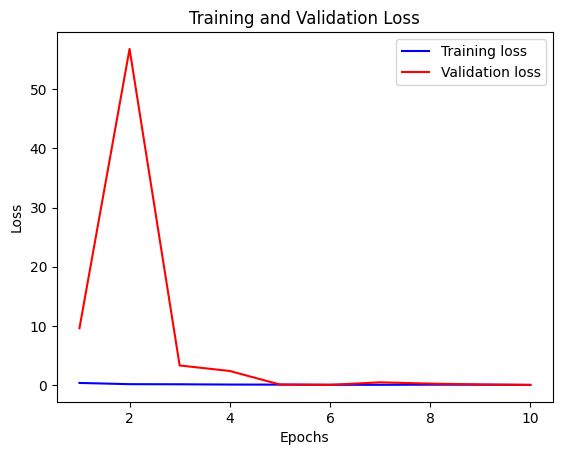

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

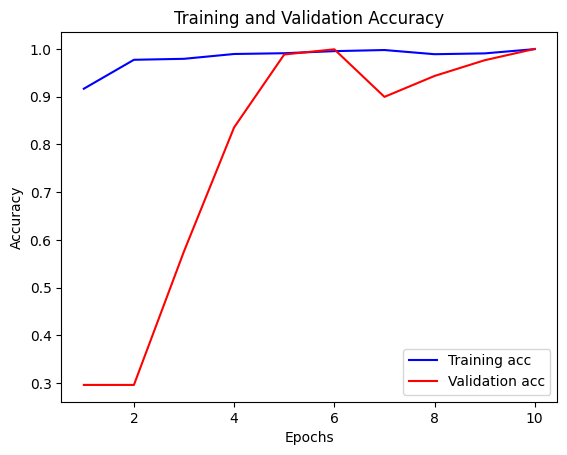

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()